# Accessing and creating content

Your GIS can host a [variety of maps, web layers, analytical tools, apps](http://doc.arcgis.com/en/arcgis-online/reference/geo-info.htm) and [individual files](http://doc.arcgis.com/en/arcgis-online/share-maps/supported-items.htm). Using the `gis` module, you can search for, access and manage all your folders, contents and automate such maintenance workflows as scripts.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Accessing-and-creating-content" data-toc-modified-id="Accessing-and-creating-content-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Accessing and creating content</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#About-search" data-toc-modified-id="About-search-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>About search</a></span></li><li><span><a href="#Searching-for-content" data-toc-modified-id="Searching-for-content-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Searching for content</a></span><ul class="toc-item"><li><span><a href="#Wild-card-search" data-toc-modified-id="Wild-card-search-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Wild card search</a></span></li><li><span><a href="#Searching-for-content-outside-your-portal" data-toc-modified-id="Searching-for-content-outside-your-portal-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Searching for content outside your portal</a></span></li><li><span><a href="#Searching-for-content-in-ArcGIS-Online" data-toc-modified-id="Searching-for-content-in-ArcGIS-Online-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Searching for content in ArcGIS Online</a></span></li><li><span><a href="#Searching-for-content-with-multiple-filtering-clauses" data-toc-modified-id="Searching-for-content-with-multiple-filtering-clauses-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Searching for content with multiple filtering clauses</a></span></li></ul></li><li><span><a href="#Creating-new-content" data-toc-modified-id="Creating-new-content-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating new content</a></span><ul class="toc-item"><li><span><a href="#Publishing-an-item-as-a-web-layer" data-toc-modified-id="Publishing-an-item-as-a-web-layer-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Publishing an item as a web layer</a></span></li><li><span><a href="#Importing-data-from-a-pandas-data-frame" data-toc-modified-id="Importing-data-from-a-pandas-data-frame-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Importing data from a pandas data frame</a></span></li><li><span><a href="#Publishing-an-empty-service" data-toc-modified-id="Publishing-an-empty-service-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Publishing an empty service</a></span></li></ul></li><li><span><a href="#Organizing-content" data-toc-modified-id="Organizing-content-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Organizing content</a></span><ul class="toc-item"><li><span><a href="#Using-folders-to-organize-your-content" data-toc-modified-id="Using-folders-to-organize-your-content-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Using folders to organize your content</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## Import libraries

In [2]:
import os
import datetime as dt

import pandas 

from arcgis.gis import GIS

C:\Users\tar12555\AppData\Local\ESRI\conda\envs\pyapi-dev\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tar12555\AppData\Local\ESRI\conda\envs\pyapi-dev\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
C:\Users\tar12555\AppData\Local\ESRI\conda\envs\pyapi-dev\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\tar12555\AppData\Local\ESRI\conda\envs\pyapi-dev\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## About search

As mentioned in the [`gis module`](https://developers.arcgis.com/python/guide/the-gis-module/) guide, the Python API uses [Resource Manager classes](https://developers.arcgis.com/python/guide/the-gis-module/) to manage Web GIS users, groups, datastores, and content. You access the [`UserManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager), [`GroupManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#groupmanager) and [`ContentManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager) classes as the `users`, `groups`, and `content` properties of the [`GIS`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis), respectively. (See [`Helper objects`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis) for details.)

Each resource manager implements the [ArcGIS REST API](https://developers.arcgis.com/rest/users-groups-and-items/search.htm) `search` operation as a method. For example, `gis.content.search()`. It's important to understand that the `search` mechanism uses many different inputs to find possible matches, ranks them and returns appropriate results. The `search` becomes ideal for human interaction, but `fuzzy` when looking for specific records programmatically. The search results are non-deterministic. Using `search` may not necessarily be the best approach for finding specific items, but more a group of items from which to further filter. 

It's also important to know that using `search` programmatically, like with the Python API, does not correspond identically to searching with an application written in a different language.  The various `search` options in the ArcGIS Online or Portal for ArcGIS Enterprise interfaces work differently than the Python API resource managers' `search`. Different applications may use different inputs. The relationship between a content `search` in one application, like a Portal or ArcGIS Online viewer, is not one-to-one with a content search using the Python API even when logged in as the same user.

Let's look at an example to clarify:

In [2]:
# Log into ArcGIS Online
gis = GIS(profile='your_online_profile')

In [3]:
# Search for Feature Layers owned by the logged-in user
my_content = gis.content.search(query="owner:" + gis.users.me.username, 
                                item_type="Feature Layer", 
                                max_items=15)

my_content

[<Item title:"0ff721b591bb4526a0877b4708488db1" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"UnemploymentRateHotspots245326" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"6f0e42f4e35540b180f92263da913dba" type:Table Layer owner:arcgis_python>,
 <Item title:"6cf4c07182ef44c3b8d0f64f28a8fd7e" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"DissolveBoundaries18992" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"9b5bddb9555442f0b7420ba63aa4db40" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"DissolveBoundaries425210" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"test dffgvrdfbdffbg483152" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"c8b9af28c4164d6b8aeda68c95dfb2e5" type:Table Layer owner:arcgis_python>,
 <Item title:"api-downloads-1yr" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"5128c4b217154f6183e9313abc2baf04" type:Feature Layer 

Using Fiddler to examine the REST API query made to the server, it looks like this:

In [ ]:
https://geosaurus.maps.arcgis.com/sharing/rest/search?
    f=json
    &q=owner:arcgis_python AND (type:"feature service") accountid:xxxxxxxxxxxxxxxx
    &start=1
    &num=100
    &sortFields=avgRating
    &sortOrder=desc
    &token=<my_web_gis_token>   

Logging into the same ArcGIS Online Organization in a web browser as the same user, navigate to `My Content`, and then select `All My Content` in the `Folders` panel. Then navigate to the `Filters` panel, choose `Layers` and then further filter on `Feature Layers`.  Using the Developer Tools of the web browser, examine the REST API Query and see it looks like this:

In [ ]:
https://geosaurus.maps.arcgis.com/sharing/rest/search?
    num=20
    &start=1
    &sortField=modified
    &sortOrder=desc
    &q= owner:"arcgis_python" orgid:xxxxxxxxxxxxxxxx 
            (type:("Feature Collection" OR "Feature Service" OR "Stream Service" OR "WFS") 
            -typekeywords:"Table")  -type:("Code Attachment") -typekeywords:("MapAreaPackage") 
            -type:("Map Area")
    &f=json
    &token=<my_arcgis_online_token>
    
https://geosaurus.maps.arcgis.com/sharing/rest/search?
    num=6
    &start=0
    &sortField=title
    &sortOrder=asc
    &q=(group:"group_id1" AND 
        id:("item_id1" OR "item_id2" 
        OR "item_id3" OR "item_id4" 
        OR "item_id5" OR "item_id6"))
    &f=json
    &token=<my_arcgis_online_token>

The REST API queries differ between the applications written in different languages. You can expect different results between seemingly similiar queries to the same server when using different applications to search. The Python API `search` may return different results than the ArcGIS Enterprise or ArcGIS Online map viewers and other applications.

#### Search Tip
Python [`list comprehensions`](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) can augment the resource managers `search` functionality to allow for more precise queries.
> _NOTE:_ List comprehension processing is performed on the client side.

To return a list of items owned by the logged in user published on a specific day, create a `datetime` object to represent midnight as the start of the day, and a second `datetime` object representing the end of the day. Convert each to millisecond integers since that is how an ArcGIS portal stores date values.

In [4]:
day_start = dt.datetime(2019, 5, 30, 0, 0, 0, 0)
day_end = dt.datetime(2019, 5, 30, 23, 59, 59, 999999)

start_timestamp = int(day_start.timestamp() * 1000)
end_timestamp = int(day_end.timestamp() * 1000)

Use the timestamps in a list comprehension:

In [5]:
content_published_53019 = [item
                        for item in gis.content.search(query="* AND \
                                                owner:" + gis.users.me.username,
                                                max_items=50)
                        if item.created > start_timestamp 
                        and item.created < end_timestamp]

Write a function to return a human-readable date string and print the list

In [6]:
def readable_date(portal_stamp):
    return dt.datetime.fromtimestamp(portal_stamp/1000).strftime('%B %d %Y at %I:%M.%S %p')

In [7]:
title = "Item Title"
item_type = "Item Type"
publish = "Published"
print(f"{title:40}{item_type:25}{publish:40}")

for content in content_published_53019:
    print(f" {content.title:<40} {content.type:25} {readable_date(content.created):40}")

Item Title                              Item Type                Published                               


<a id="searching-for-content"></a>
## Searching for content

Accessing the `content` property of your `gis` object returns you an instance of `ContentManager` class. You can use the `search()` method of the `ContentManager` object to search for items on your GIS. You can use the `search()` even if you are connected as an anonymous user, in which case you get to search for public content on ArcGIS Online.

The first step is to import the API and connect to your GIS

In [8]:
from arcgis.gis import GIS
gis = GIS(profile="your_enterprise_profile")

Lets see what you get when you access `content` property

In [9]:
type(gis.content)

arcgis.gis.ContentManager

As explained earlier, we don't recommend creating an instance of the [`ContentManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager) directly, but instead recommend accessing it through the `content` property of your `GIS` object as shown below:

In [10]:
search_result = gis.content.search(query="title:Ports along US West Coast", item_type="Feature Layer")
search_result

[<Item title:"Ports in the Western US" type:Feature Layer Collection owner:api_data_owner>]

The `search()` method returned us a list of `Item` objects that matched the search criteria and that the logged in user had permissions to access. The `query` parameter supports a variety of inputs. Refer to the [**search reference**](https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm) for more ideas on what is supported. Some typical examples are shown below:

In [11]:
# search and list all feature layers in my contents
search_result = gis.content.search(query="", item_type="Feature Layer")
search_result

[<Item title:"Target_Parcels_with_Join_Pools_in_Redlands" type:Feature Layer Collection owner:rohitgeo>,
 <Item title:"wp_subset_urban_dist" type:Feature Layer Collection owner:arcgispyapibot>,
 <Item title:"SwimmingPools180605b" type:Feature Layer Collection owner:portaladmin>,
 <Item title:"68141df3a1a34243acd9466b35ea7c91" type:Feature Layer Collection owner:playground_test>,
 <Item title:"wp_clean_061722" type:Feature Layer Collection owner:arcgispyapibot>,
 <Item title:"Chennai_precipitation_1" type:Feature Layer Collection owner:arcgispyapibot>,
 <Item title:"FGDBEmpty" type:Feature Layer Collection owner:andrew>,
 <Item title:"be343ca6ccff47a5a100a5ecc358c3de" type:Feature Layer Collection owner:playground_test>,
 <Item title:"db7a39387c4b4f4ea138b7007dd6ebe4" type:Feature Layer Collection owner:jroebuck>,
 <Item title:"uganda_wp_buffer" type:Feature Layer Collection owner:arcgispyapibot>]

Notice how the search result includes items owned by other users that are shared across the organization. You can limit the search to only your content by specifying that in the query string as shown below:

In [12]:
search_my_contents = gis.content.search(query="owner:arcgis_python", 
                                        item_type="Feature *")
search_my_contents

[<Item title:"LT" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"Test CSV BRITISH CITIES2" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"test666" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"arun excel" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"LT" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"Flight Paths Polyline 1613812364" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"USA Capitals spreadsheet 1609855019" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"USA Capitals spreadsheet 1611799454" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"USA Capitals spreadsheet_1609936075" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"TEMPORAIRE" type:Feature Layer Collection owner:arcgis_python>]

### Wild card search
Search supports usage of wild cards. You can use one asterisk `*` for multiple character wild card search and one question mark `?` for single character.

In [13]:
search_result_USA = gis.content.search(query="title:USA*")                  
search_result_USA

[<Item title:"USA median age map" type:Web Map owner:arcgis_python>,
 <Item title:"USA median age map" type:Web Map owner:arcgis_python>,
 <Item title:"USA median age map" type:Web Map owner:arcgis_python>,
 <Item title:"USA Capitals spreadsheet 1613717378" type:CSV owner:arcgis_python>,
 <Item title:"USA median age map" type:Web Map owner:arcgis_python>,
 <Item title:"USA " type:Web Map owner:arcgis_python>,
 <Item title:"USA " type:Web Map owner:arcgis_python>,
 <Item title:"USA Capitals spreadsheet_1602810416" type:CSV owner:arcgis_python>,
 <Item title:"USA median age map" type:Web Map owner:arcgis_python>,
 <Item title:"USA median age map" type:Web Map owner:arcgis_python>]

### Searching for content outside your portal
So far, we searched for content that belonged to the logged in user, as well as items shared within the portal and published by built-in accounts and other named users in the same portal. When connected to ArcGIS Online or connected to ArcGIS Enterprise configured to access ArcGIS Online, you can also search for content published and shared publicly even if the named users are in other portals. You can do so by turning the **`outside_org`** flag to `True`.

In [14]:
# search for content that begin with a prefix - say 'USA'
search_result_USA = gis.content.search(query="title:USA*", outside_org=True)                  
search_result_USA

[<Item title:"USA Major Cities" type:Web Map owner:esri_livingatlas>,
 <Item title:"USA Protected Areas - Public Access" type:Vector Tile Layer owner:esri_livingatlas>,
 <Item title:"USA Official Protraction Diagrams" type:Feature Layer Collection owner:esri_livingatlas>,
 <Item title:"USA SSURGO - Nonirrigated Capability Class" type:Imagery Layer owner:esri_livingatlas>,
 <Item title:"USA Forest Service Lands" type:Imagery Layer owner:esri_livingatlas>,
 <Item title:"USA Protected Areas - Protection Mechanism Category" type:Vector Tile Layer owner:esri_livingatlas>,
 <Item title:"2020 USA Per Capita Income" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"USA Protected Areas - GAP Status 2" type:Imagery Layer owner:esri_livingatlas>,
 <Item title:"2021 USA Child Care Spending" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2020 USA Unemployment Rate" type:Map Image Layer owner:esri_livingatlas>]

Notice the `Living Atlas` content returned in the results. The portal administrator configured the portal to access Living Atlas centent. 

When using the Jupyter notebook environment, you can utilize the rich representation of items for your query results.

<Item title:"USA Major Cities" type:Web Map owner:esri_livingatlas>
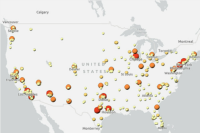

<Item title:"USA Protected Areas - Public Access" type:Vector Tile Layer owner:esri_livingatlas>
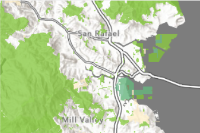

<Item title:"USA Official Protraction Diagrams" type:Feature Layer Collection owner:esri_livingatlas>
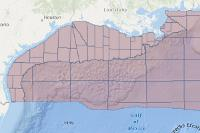

<Item title:"USA SSURGO - Nonirrigated Capability Class" type:Imagery Layer owner:esri_livingatlas>
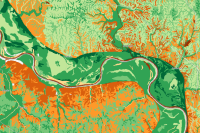

<Item title:"USA Forest Service Lands" type:Imagery Layer owner:esri_livingatlas>
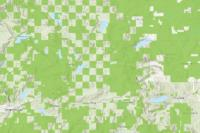

<Item title:"USA Protected Areas - Protection Mechanism Category" type:Vector Tile Layer owner:esri_livingatlas>
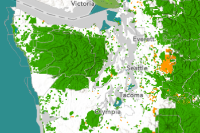

<Item title:"2020 USA Per Capita Income" type:Map Image Layer owner:esri_livingatlas>
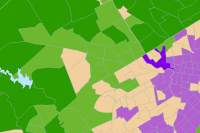

<Item title:"USA Protected Areas - GAP Status 2" type:Imagery Layer owner:esri_livingatlas>
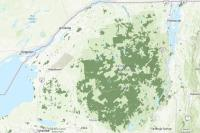

<Item title:"2021 USA Child Care Spending" type:Map Image Layer owner:esri_livingatlas>
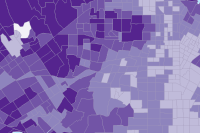

<Item title:"2020 USA Unemployment Rate" type:Map Image Layer owner:esri_livingatlas>
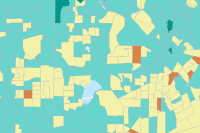

In [15]:
from IPython.display import display
for item in search_result_USA:
    display(item)

Once you know an item's id (called `itemId`), you can access it using the `get()` method instead of searching for it.

In [16]:
# lets get the itemid of first item from previous query
first_item = search_result_USA[0]
known_item_id = first_item.id
print(known_item_id)

c7a0023f7c0a424e8bdff6d77c877f20


<Item title:"USA Major Cities" type:Web Map owner:esri_livingatlas>
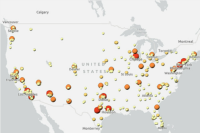

In [17]:
# lets use the get() to access this item
online_historic_item = gis.content.get(known_item_id)
online_historic_item

### Searching for content in ArcGIS Online
So far, we searched for content accessible to a user logged into ArcGIS Enterprise. Let's connect directly to an ArcGIS Online Organization and futher explore ways to search for web GIS content.

In [3]:
# connect to ArcGIS Online
gis2 = GIS(profile="your_online_profile")

Let us search for public web scenes visualizing 3D cities. Note, I want to see content that is most popular by number of views to be returned on the top. I am also concerned that if too many items show up, the query might be running slow, hence restrict the results to 15 items.

<Item title:"Invozone_Catalyst_Cities_5bba6" type:Web Scene owner:viewproguest>
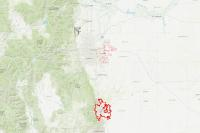

<Item title:"Capital City 3D (Web 2.0)" type:Web Scene owner:mat.sedgwick>

<Item title:"Visualize New Developments" type:Web Scene owner:esri_3d>
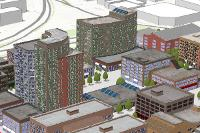

<Item title:"Maa-amet 3D" type:Web Scene owner:AndresKasekampMA>
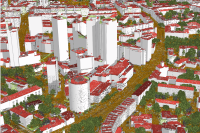

<Item title:"CARTE 3D DE GENEVE" type:Web Scene owner:sitg>
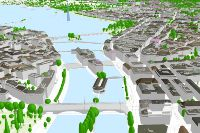

<Item title:"Satellite Maps 3D Scene 2023 - for website" type:Web Scene owner:rafael.deameller_noaa>
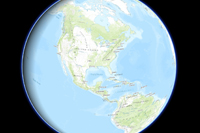

<Item title:"Winter Sun Exposure" type:Web Scene owner:jsapi_team>
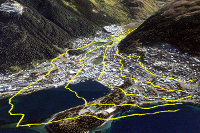

<Item title:"Capital City (Web 3D)" type:Web Scene owner:msedgwick_Latitudegeo>
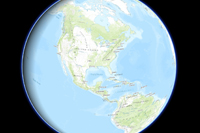

<Item title:"Human Reach - City Populations" type:Web Scene owner:whackney>
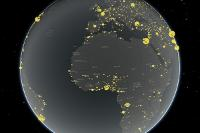

<Item title:"Boston development visualizations" type:Web Scene owner:scene_viewer>
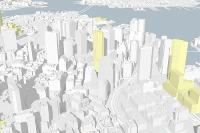

<Item title:"Berlin, Germany Scene" type:Web Scene owner:esri_3d>
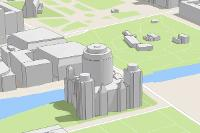

<Item title:"GeoZone_webscene" type:Web Scene owner:viewpro_cityofaubrey>
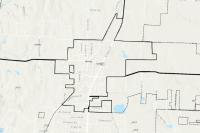

<Item title:"Rotterdam, the Netherlands Scene" type:Web Scene owner:esri_3d>
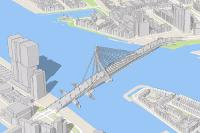

<Item title:"City 3D" type:Web Scene owner:Bayswater53>
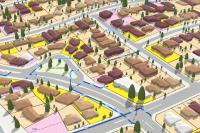

<Item title:"Webscene Saving Sample" type:Web Scene owner:jsapi_team>
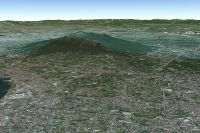

In [4]:
public_3d_city_scenes = gis2.content.search(query="3d cities", item_type = "web scene",
                                           sort_field="numViews" ,sort_order="desc",
                                           max_items = 15, outside_org=True)
for item in public_3d_city_scenes:
    display(item)

### Searching for content with multiple filtering clauses
So far, we searched for content with single condition listed in the `query` string. Let's further explore how to search with multiple filter clauses which refines the returned results in the web GIS content.

In [21]:
items = gis.content.search(query='owner:' + gis.users.me.username + ' type:map',
                           max_items=1000)
len(items)

475

In [22]:
items = gis.content.search(query='type:map AND owner:' + gis.users.me.username,
                           max_items=1000)
len(items)

475

When the search filters contain two or more clauses, the recommended schema is to have clauses separated by blank, or `AND`. The order of filters does not affect the search results if filters are separated by a `space` or with `AND` operator instead of a `comma`. The queries shown above return the same number of items.

However, when `comma` is used to separate search filters in a query string, then the order of filters affects the search results. For instance, the first cell below returns expected number of results, while the second cell returns no items in search results.

> _NOTE:_ When multiple filtering clauses separated by comma in the `query` parameter, the filtering condition for `owner` cannot be placed at the first position. For more, please check [Search Reference](                       https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm).

In [23]:
items = gis.content.search(query='type:map, owner:' + gis.users.me.username,
                           max_items=1000)
len(items)

475

In [24]:
items = gis.content.search(query='owner:' + gis.users.me.username + ', type:map',
                           max_items=1000)
len(items)

0

You applied filters and optional parameters to search for content from other users in different organizations. This collaborative aspect of GIS is quite powerful. You can quickly scale up your projects by leveraging the maps and GIS data shared by other users. You can also get ideas on how to visualize or render a particular phenomenon through the experience of others who have shared how they completed it. You can do all of this using the API, easily writing scripts to automate tasks such as notifying you whenever someone shares an item in a particulare topic of interest.

So far, you observed how existing items can be searched and accessed using the `gis` module. Next, let us observe how new content can be created.

## Creating new content

To create new items on your GIS, you use the [`add()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.add) method on a `ContentManager` instance. Again, rather than creating an instance of the `ContentManager` directly, the Python API implements the class as the `content` property of your `GIS` object.

The `add()` method accepts a dictionary containing the properties of the item to be created. The optional `data` parameter accepts a string path to a file. You can use the optional `metadata` parameter to specify an XML file containing metadata information.

All content you add this way is added to the authenticated user's contents. Let us connect to our Enterprise instance, add a csv file as an item and then publish a feature layer from it.

For example, set up a path to the data:
`data_path = os.path.join(r"<your_drive>:\\", "path", "to", "data")`

In [6]:
data_path = (r".\data")

We are going to create an item titled "Earthquakes around the world from 1800s to early 1900s", but first let's see if there is any item already created with the same title by the current user, if it is then we'll delete it so that there are no duplicate items

In [9]:
username = gis.users.me.username

In [11]:
for earthquakes_csv_item in gis.content.search(query="title:Earthquakes around the world from 1800s to early 1900s AND owner:"+username):
    earthquakes_csv_item.delete()

In [12]:
csv_path = os.path.join(data_path, "earthquakes.csv")
csv_properties={'title':'Earthquakes around the world from 1800s to early 1900s',
                'description':'Measurements from globally distributed seismometers',
                'tags':'arcgis, python, earthquake, natural disaster, emergency'}
thumbnail_path = os.path.join(data_path, "earthquake.png")

earthquake_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path,
                                     thumbnail = thumbnail_path)

The `add()` method returns an object of type `arcgis.gis.Item` representing the added item. In Jupyter notebook environment, you can visualize it by querying the item

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:CSV owner:arcgis_python>
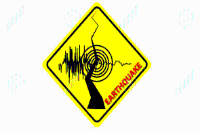

In [29]:
earthquake_csv_item

**Note**: You can specify most properties of an item as a dictionary to the `item_properties` parameter. Refer to the [API ref doc](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.add) of this method for a definitive list. You could also specify an empty dictionary to this parameter, the downside is search cannot index these items efficiently if it does not have sufficient metadata information, hence that is not a good programming practice.

### Publishing an item as a web layer
In the example above you added a csv [`Item`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item) to the portal. Items such as csv files, service definitions, file geodatabases, shapefiles and packages such as tile, scene and vector tile packages can be published into hosted web layers. You call the [`publish()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.publish) method on the `Item` object to create the web layer.

Optionally, The `publish()` method accepts an optional `publish_parameters` dictionary where you can specify certain parameters. See the [publish REST API](https://developers.arcgis.com/rest/users-groups-and-items/publish-item.htm) documentation for detailed descriptions on these parameters. For instance, the `address_fields` parameter allows you to specify which field in your csv or dataset contains address fields suitable for geocoding.

Let us publish the csv into a web feature layer. This csv contains latitude and longitude coordinates of each point, hence the `address_fields` parameter can be ignored. The `publish()` method returns an `Item` object corresponding to the web layer created.

In [30]:
earthquake_feature_layer_item = earthquake_csv_item.publish()

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:Feature Layer Collection owner:arcgis_python>
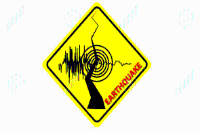

In [31]:
earthquake_feature_layer_item

Notice that the GIS used the same metadata (thumbnail, title, description) of the source item used for publishing. This helps provide context on what the new item is and also as a good starting point for the metadata which you can edit later.

<a id="importing-data-from-a-pandas-data-frame"></a>
### Importing data from a pandas data frame

[Pandas](http://pandas.pydata.org) is a popular data analysis library for Python. The data frame object of pandas allows you to store and analyze tabular information with ease. Using the Python API, you can import such data frames as an `arcgis.features.FeatureCollection` object using the `import_data()` method. You can then add that feature collection as an item to your GIS.

Let us create a new pandas data frame representing locations of a few coastal cities read from a csv file. Note, in the example below, you could publish the csv as an item as shown earlier, but we will observe how you can filter that data through pandas and add it as a feature collection instead.

In [13]:
# read csv as a pandas dataframe
ports_df = pandas.read_csv(os.path.join(data_path, "ports.csv"))
ports_df

,country,globalid,harborsize,label_position,latitude,longitude,port_name,short_form,geometry.x,geometry.y
0,US,{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF},L,SW,37.816667,-122.416667,SAN FRANCISCO,SFO,-13627360,4553559
1,US,{6EE30C76-399D-42F5-B6ED-403C94DFFCD4},S,SW,37.783333,-122.266667,ALAMEDA,NGZ,-13610660,4548863
2,US,{A6A21CC3-DE52-4B8A-A5B2-1CAA726E7F02},L,SW,37.816667,-122.333333,OAKLAND,OAK,-13618080,45535590
3,US,{265AD7A6-4F59-4181-88DE-194F23F64E92},S,SW,37.916667,-122.366667,POINT RICHMOND,RIC,-13621800,4567660
4,US,{B15D545F-83DD-4D3E-9051-6D9F290A8E9E},S,SW,38.100000,-122.266667,MARE ISLAND,NaN,-13610660,4593562
5,US,{A97E8B59-1E25-416E-9206-4B59A869E2F4},S,SW,38.083333,-122.250000,SOUTH VALLEJO,NaN,-13608810,4591205
6,US,{8EB57C5B-100B-4C50-B6B1-4D6B9B1C7545},S,SW,37.950000,-121.300000,STOCKTON,SCK,-13503050,4572365
7,US,{3B7B126E-0B60-49AF-89AA-4AC05402CFEA},S,SW,38.583333,-121.500000,SACRAMENTO,SMF,-13525320,4662162
8,US,{20378B4B-3E9E-47D2-AF42-4F0A31D5CA66},S,SW,40.800000,-124.183333,EUREKA,ACV,-13824030,4982886
9,US,{782C11E0-B02D-45AB-8BAD-97C1B5817812},M,SW,43.400000,-124.283333,EMPIRE,NaN,-13835160,5373055


In [15]:
# find latitude of SFO
lat = ports_df.loc[ports_df.port_name == 'SAN FRANCISCO']['latitude']
lat

0    37.816667
Name: latitude, dtype: float64

In [16]:
# only select ports that are to the south of SFO
ports_south_of_SFO = ports_df.loc[ports_df.latitude < lat[0]]
ports_south_of_SFO

,country,globalid,harborsize,label_position,latitude,longitude,port_name,short_form,geometry.x,geometry.y
1,US,{6EE30C76-399D-42F5-B6ED-403C94DFFCD4},S,SW,37.783333,-122.266667,ALAMEDA,NGZ,-13610660,4548863
11,US,{A04935D7-314D-43D3-AA39-99E91FE93BD5},M,SW,32.716667,-117.183333,SAN DIEGO,SAN,-13044790,3857756
12,US,{45CCFAFA-CE13-4EEE-907A-5C53A486C434},M,SW,33.766667,-118.183333,LONG BEACH,LGH,-13156110,3997514
13,US,{ECA58B5E-ADBB-4392-A6F2-1F5476E69375},S,SW,36.616667,-121.883333,MONTEREY,MRY,-13567990,4385809
15,US,{B8AC37F8-5AA6-4D27-A401-7B35A8E4B9D3},S,SW,21.950000,-159.350000,NAWILIWILI BAY,NaN,-17738760,2505523
16,US,{6D718925-1CF2-4A45-9E3D-B4FBE215BA71},S,SW,21.900000,-159.583333,PORT ALLEN,NaN,-17764740,2499523
17,US,{50ECBCE3-137E-45BF-A42E-F0D423434067},M,SW,21.300000,-157.866667,HONOLULU,HNL,-17573640,2427687
18,US,{9168C51F-28FF-4885-AFD5-18A1607E3808},S,SW,20.033333,-155.833333,KAWAIHAE,NaN,-17347290,2276980
19,US,{A2A35C01-C1D4-4FD0-B74E-424E1A9DE20F},M,SW,19.733333,-155.066667,HILO,ITO,-17261940,2241467


Now that we have the desired data frame, let us import that as a feature collection

In [17]:
ports_fc = gis.content.import_data(ports_south_of_SFO)
ports_fc

<FeatureCollection>

Next step is to convert the feature collection to a JSON and add it as a text based item to the GIS. The `feature collection` properties provides the layer definition and feature set for a layer. Construct a python dictionary from these properties, and then use the dictionary in a list as the `layers` property of a json `featureCollection` to add the item to the portal. 

In [18]:
import json
ports_fc_dict = dict(ports_fc.properties)
ports_json = json.dumps({"featureCollection": {"layers": [ports_fc_dict]}})

We are going to create an item titled "Ports to the south of SFO along west coast of USA", but first let's see if there is any item already created with the same title by the current user, if it is then we'll delete it so that there are no duplicate items

In [25]:
for ports_item in gis.content.search(query="title:Ports to the south of SFO along west coast of USA AND owner:"+username):
    ports_item.delete()

In [27]:
ports_item_properties = {'title': 'Ports to the south of SFO along west coast of USA',
                        'description':'Example demonstrating conversion of pandas ' + \
                         'dataframe object to a GIS item',
                        'tags': 'arcgis python api, pandas, csv',
                        'text':ports_json,
                        'type':'Feature Collection'}
ports_item = gis.content.add(ports_item_properties)
ports_item

<Item title:"Ports to the south of SFO along west coast of USA" type:Feature Collection owner:arcgis_python>

**Note**: here, we used the `add()` method to add the `FeatureCollection` object in memory as an item on the GIS. Notice we used the `text` property to pass the JSON representation of the feature collection and the `type` property to indicate the item type. You can use the same method to publish web maps and web scenes.

The [sample notebooks for content publishers](https://developers.arcgis.com/python/sample-notebooks/publishing-web-maps-and-web-scenes/) show how the concepts discussed here can be used to publish web maps and scenes to your GIS

<a id="publishing-an-empty-service"></a>
### Publishing an empty service

So far, we observed how an existing item can be used to publish a service. The `ContentManager` class allows you to publish a new service without any content using the `create_service()` method. This capability is useful when you want to create an empty service first then add content to it by editing it from client applications - Collector for ArcGIS for instance.

Before you create a service, you would want to ensure your desired service name is available. Since service name is part of the URL for a service, they need to be unique for a service type in an organization. For this purpose, you would use `is_service_name_available()` method.

Below, let us publish an empty feature service. If successful, the API would return a feature layer item.

In [35]:
# check if service name is available
gis.content.is_service_name_available(service_name= "awesome_python", service_type = 'featureService')

True

In [36]:
# let us publish an empty service
empty_service_item = gis.content.create_service(name='awesome_python', service_type='featureService')
empty_service_item

<Item title:"awesome_python" type:Feature Layer Collection owner:arcgis_python>

In [37]:
# access the layers property of the item
empty_service_item.layers

[]

Notice that, there are no layers in this service. The first step when you edit such a service would be to [update its service definition](https://developers.arcgis.com/python/guide/updating-feature-layer-properties/#Update-definition) and enable the editing related capabilities.

<a id="organizing-content"></a>
## Organizing content
Over time, your GIS can get filled with content. You can create folders on your GIS, just like in your file system, and use it to organize.

<a id="using-folders-to-organize-your-content"></a>
### Using folders to organize your content
The `create_folder()` and `delete_folder()` methods available on the `ContentManager` class can be used to manage your folders. Once created, you can use the `move()` method to move content into and out of folders.

Let us create a folder called 'ports' and move the `ports_item` into it 

In [38]:
# create new folder
gis.content.create_folder(folder='ports')

C:\Users\tar12555\AppData\Local\ESRI\conda\envs\pyapi-dev\lib\site-packages\IPython\core\interactiveshell.py:3553: DeprecatedWarning: create_folder is deprecated as of 2.3.0 and has be removed in 3.0.0. Use `gis.content.folders.create` instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


{'username': 'arcgis_python',
 'id': 'a2e4bca479bb4c1da0c5160f8c596e2b',
 'title': 'ports'}

In [39]:
# move the ports_item into this folder
ports_item.move(folder='ports')

{'success': True,
 'itemId': '5f85dc7bb8eb44d6b29fc142aa830ccd',
 'owner': 'arcgis_python',
 'folder': 'a2e4bca479bb4c1da0c5160f8c596e2b'}

You can move content out of folders to root by calling the `move()` method and specifying `/` as folder name

In [40]:
# move back to root
ports_item.move(folder='/')

{'success': True,
 'itemId': '5f85dc7bb8eb44d6b29fc142aa830ccd',
 'owner': 'arcgis_python',
 'folder': 'null'}

In [41]:
gis.content.delete_folder(folder='ports')

C:\Users\tar12555\AppData\Local\ESRI\conda\envs\pyapi-dev\lib\site-packages\IPython\core\interactiveshell.py:3553: DeprecatedWarning: delete_folder is deprecated as of 2.3.0 and has be removed in 3.0.0. Use `Folder.delete()` instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


True

## Summary
Thus, in this guide you observed how the `gis` module can be used to create new content and search for existing ones. Head over to the guide on [managing-your-content](https://developers.arcgis.com/python/guide/managing-your-content) next. When combined into a script, the ArcGIS API for Python becomes a powerful tool to automate your GIS content creation and management tasks.